In [17]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="ticks")

In [18]:
df = pd.read_csv('dry-beans-top2.csv')

del df['Unnamed: 0']
del df['2']
df.columns = ['configuration', 'function','epochs','f1']
df

,configuration,function,epochs,f1
0,"[10, 50]",0,10,0.543200
1,"[100, 200]",0,10,0.823394
2,"[50, 200]",0,10,0.697380
3,"[50, 10]",0,10,0.615544
4,"[50, 100]",0,10,0.346560
...,...,...,...,...
425,"[100, 200, 50]",0,50,0.756904
426,"[100, 50, 10]",0,50,0.481810
427,"[200, 50, 10]",0,50,0.408485
428,"[50, 10, 200]",0,50,0.570162


In [19]:
df['configuration'] = df['configuration'].apply(ast.literal_eval)
df['layers'] = df.apply(lambda x: len(x['configuration']), axis=1)
df['total_nodes'] = df.apply(lambda x: sum(x['configuration']), axis=1)

In [20]:
df

,configuration,function,epochs,f1,layers,total_nodes
0,"[10, 50]",0,10,0.543200,2,60
1,"[100, 200]",0,10,0.823394,2,300
2,"[50, 200]",0,10,0.697380,2,250
3,"[50, 10]",0,10,0.615544,2,60
4,"[50, 100]",0,10,0.346560,2,150
...,...,...,...,...,...,...
425,"[100, 200, 50]",0,50,0.756904,3,350
426,"[100, 50, 10]",0,50,0.481810,3,160
427,"[200, 50, 10]",0,50,0.408485,3,260
428,"[50, 10, 200]",0,50,0.570162,3,260


<AxesSubplot:xlabel='total_nodes', ylabel='f1'>

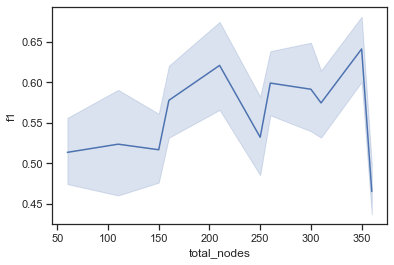

In [21]:
sns.lineplot(data=df, x="total_nodes", y="f1")

<AxesSubplot:xlabel='layers', ylabel='f1'>

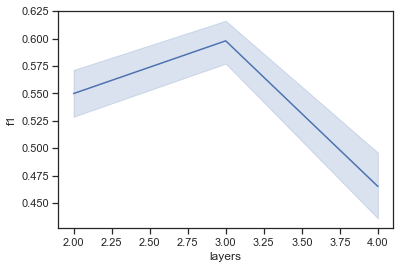

In [22]:
sns.lineplot(data=df, x="layers", y="f1")

<AxesSubplot:xlabel='epochs', ylabel='f1'>

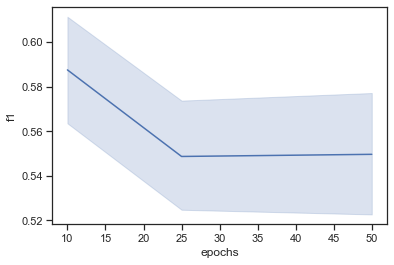

In [23]:
sns.lineplot(data=df, x="epochs", y="f1")

In [24]:
def plot_score_layer(lyrs):
    nn = df[df['layers'] == lyrs]
    for i in range(lyrs):
        layer = 'layer'+str(i+1)
        nn[layer] = nn.apply(lambda x: x['configuration'][i], axis=1)
        sns.lineplot(data=nn, x=layer, y="f1")
        plt.show()

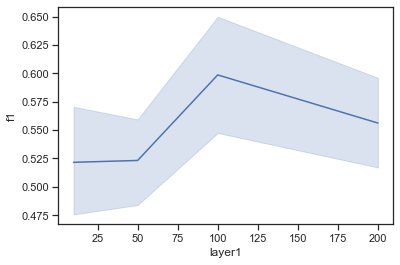

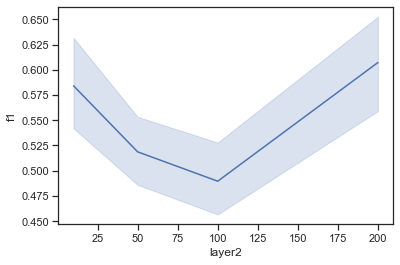

In [25]:
plot_score_layer(2)

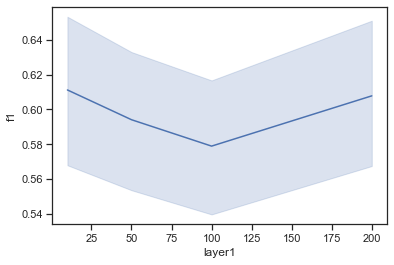

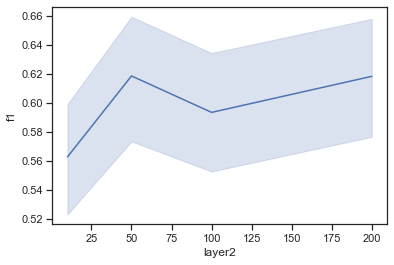

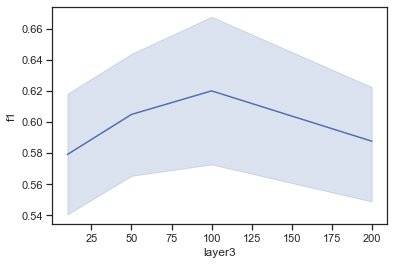

In [26]:
plot_score_layer(3)

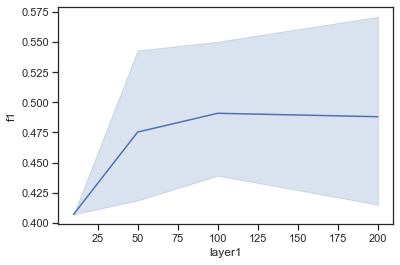

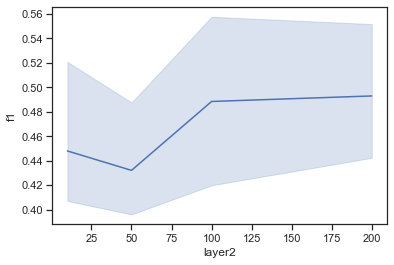

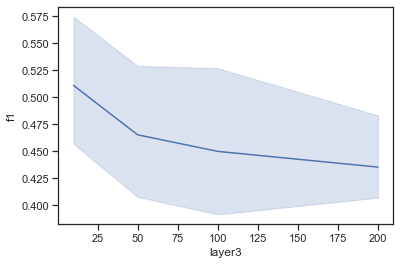

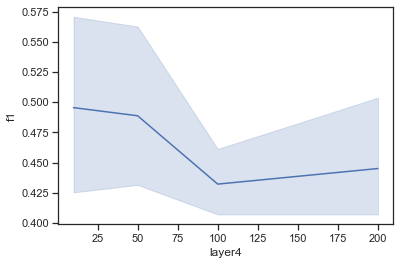

In [27]:
plot_score_layer(4)

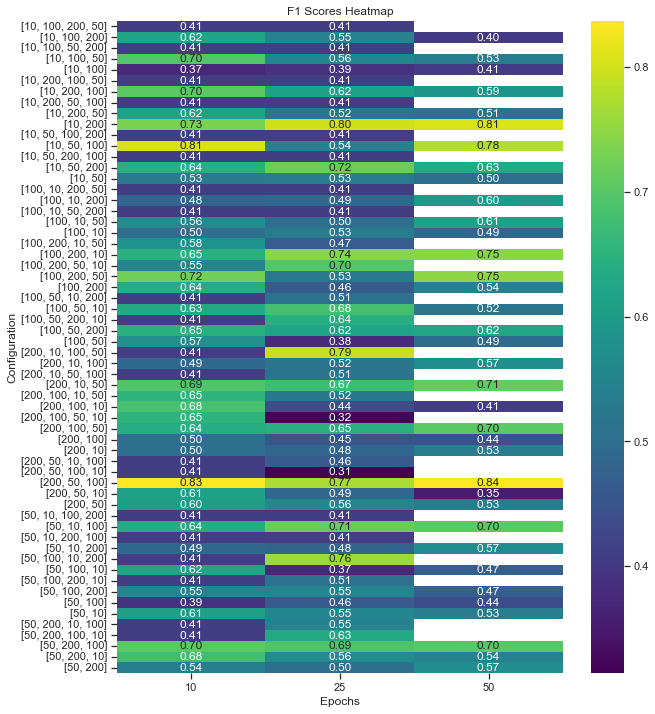

In [28]:
dfr = df[df['function']==0]
dfr['configuration'] = dfr['configuration'].astype(str)
heatmap = dfr.groupby(['configuration', 'epochs'])['f1'].mean().sort_values().unstack()
plt.figure(figsize=(10, 12))  # Adjust the figure size as needed
sns.heatmap(heatmap, cmap='viridis', annot=True, fmt='.2f', cbar=True, xticklabels=True , yticklabels=True)
plt.xlabel('Epochs')
plt.ylabel('Configuration')
plt.title('F1 Scores Heatmap')
plt.show()

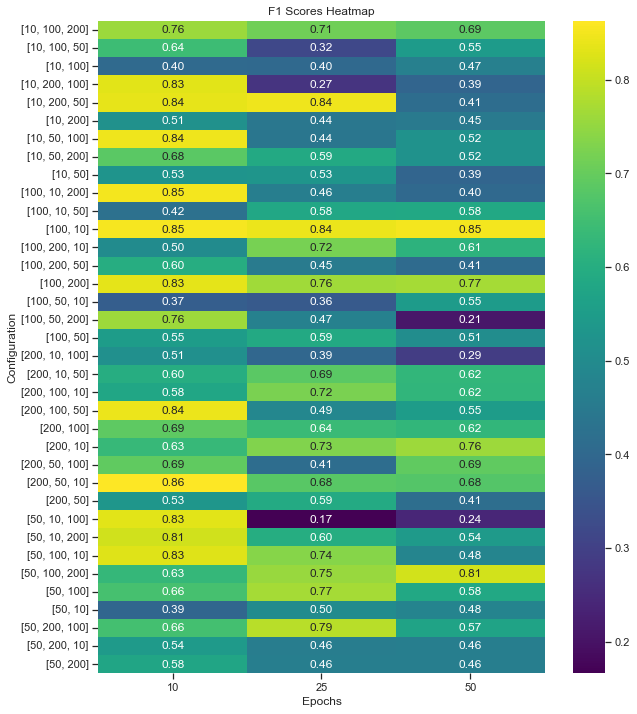

In [29]:
dft = df[df['function']==2]
dft['configuration'] = dft['configuration'].astype(str)
heatmap = dft.groupby(['configuration', 'epochs'])['f1'].mean().sort_values().unstack()
plt.figure(figsize=(10, 12))  # Adjust the figure size as needed
sns.heatmap(heatmap, cmap='viridis', annot=True, fmt='.2f', cbar=True, xticklabels=True , yticklabels=True)
plt.xlabel('Epochs')
plt.ylabel('Configuration')
plt.title('F1 Scores Heatmap')
plt.show()